In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [35]:
data = pd.read_csv("Data_DAC2024.csv")

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job titles         4706 non-null   object 
 1   AI Impact          4706 non-null   float64
 2   Tasks              4706 non-null   int64  
 3   AI models          4706 non-null   int64  
 4   AI_Workload_Ratio  4706 non-null   float64
 5   Domain             4706 non-null   object 
 6   Country            4706 non-null   object 
 7   Salary             4706 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 294.3+ KB


In [37]:
high_impact = data[data["AI Impact"] >= 0.6]

In [38]:
medium_impact = data[(data["AI Impact"] >= 0.3) & (data["AI Impact"] < 0.6)]

In [39]:
less_impact = data[data["AI Impact"] < 0.3]

In [40]:
print("Domain dan Jumlah Job Title per Domain High Impact AI")
for dom in high_impact["Domain"].unique():
    print(dom, len(high_impact[high_impact["Domain"] == dom]["Job titles"].unique()))

Domain dan Jumlah Job Title per Domain High Impact AI
Hospitality 48
Construction 48
Communication & PR 48
Sales & Marketing 48
Law Enforcement 48
Medical & Healthcare 48
Administrative & Clerical 48
Supply Chain & Logistics 48
Leadership & Strategy 48
Data & IT 48


In [41]:
print("Domain dan Jumlah Job Title per Domain Medium Impact AI")
for dom in medium_impact["Domain"].unique():
    print(dom, len(medium_impact[medium_impact["Domain"] == dom]["Job titles"].unique()))

Domain dan Jumlah Job Title per Domain Medium Impact AI
Sales & Marketing 179
Medical & Healthcare 179
Communication & PR 179
Construction 179
Supply Chain & Logistics 179
Administrative & Clerical 179
Data & IT 179
Law Enforcement 179
Leadership & Strategy 179
Hospitality 178


In [42]:
print("Domain dan Jumlah Job Title per Domain Less Impact AI")
for dom in less_impact["Domain"].unique():
    print(dom, len(less_impact[less_impact["Domain"] == dom]["Job titles"].unique()))

Domain dan Jumlah Job Title per Domain Less Impact AI
Supply Chain & Logistics 244
Law Enforcement 243
Leadership & Strategy 244
Medical & Healthcare 244
Communication & PR 244
Sales & Marketing 243
Administrative & Clerical 244
Construction 243
Hospitality 244
Data & IT 244


In [43]:
for col in high_impact.columns:
    if high_impact[col].dtype == "object":
        print(col, high_impact[col].unique(), len(high_impact[col].unique()))

Job titles ['General Clerk' 'Bricklayer' 'Contact Tracing' 'Phone Sales'
 'Credit Specialist' 'Database Engineer' 'Tax Analyst'
 'Embedded Systems Engineer' 'Bookkeeping' 'Engineering Project Manager'
 'Warranty Clerk' 'Procurement Assistant' 'Warehouse Associate'
 'Purchasing Coordinator' 'Public Safety Dispatcher' 'Energy Analyst'
 'Electrical Drafter' 'Merchandising Coordinator' 'Import Coordinator'
 'Cashier' 'Performance Analyst' 'Windows Administrator' 'Data Technician'
 'Computer Scientist' 'Market Research Interviewer'
 'Industrial Organizational Psychologist' 'Financial Examiner'
 'Java Web Developer' 'Skip Tracer' 'Administrative Officer'
 'Front End Web Developer' 'Procurement Clerk' 'J2Ee Developer'
 'Data Collector' 'Mainframe Programmer' 'Accountant'
 'Sap Project Manager' 'QA Automation Engineer'
 'Certified Surgical Technologist' 'Supply Chain Coordinator'
 'Health Data Analyst' 'Sports Analyst' 'Forensic Chemist'
 'Front Desk Attendant' 'Database Developer' 'Web Projec

In [44]:
for col in medium_impact.columns:
    if medium_impact[col].dtype == "object":
        print(col, medium_impact[col].unique(), len(medium_impact[col].unique()))

Job titles ['Geoscientist' 'Industrial Maintenance Technician'
 'Employment Specialist' ... 'Agricultural Engineer' 'Media Coordinator'
 'Network Systems Engineer'] 1789
Domain ['Sales & Marketing' 'Medical & Healthcare' 'Communication & PR'
 'Construction' 'Supply Chain & Logistics' 'Administrative & Clerical'
 'Data & IT' 'Law Enforcement' 'Leadership & Strategy' 'Hospitality'] 10
Country ['Philippines' 'Malaysia' 'Thailand' 'Indonesia' 'Singapore'] 5


In [45]:
for col in less_impact.columns:
    if less_impact[col].dtype == "object":
        print(col, less_impact[col].unique(), len(less_impact[col].unique()))

Job titles ['Adjunct Instructor' 'Technical Analyst' 'Design Manager' ...
 'Utility Engineer' 'Quality Control' 'Author'] 2437
Domain ['Supply Chain & Logistics' 'Law Enforcement' 'Leadership & Strategy'
 'Medical & Healthcare' 'Communication & PR' 'Sales & Marketing'
 'Administrative & Clerical' 'Construction' 'Hospitality' 'Data & IT'] 10
Country ['Cambodia' 'Vietnam' 'Myanmar' 'Laos' 'Philippines'] 5


In [46]:
numeric = []
for col in data.columns:
    if data[col].dtype != "object":
        numeric.append(col)

In [47]:
data_numerik = data[numeric]

In [48]:
data_numerik_corr = data_numerik.corr()

<Axes: >

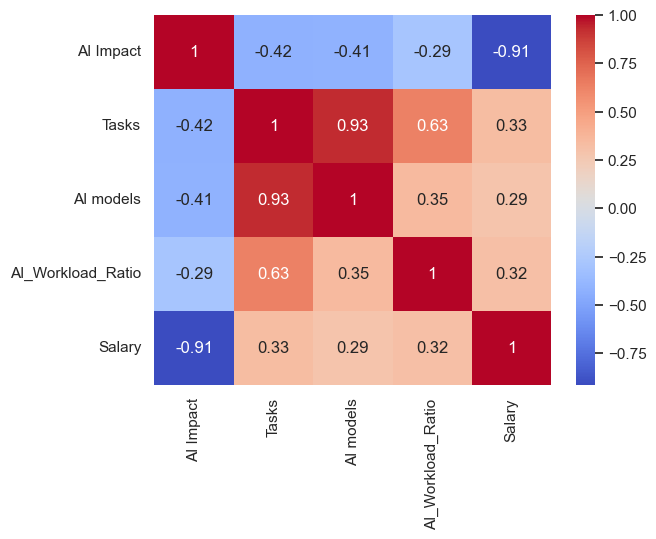

In [49]:
sns.heatmap(data_numerik_corr,annot=True, cmap='coolwarm')

<Figure size 1000x800 with 0 Axes>

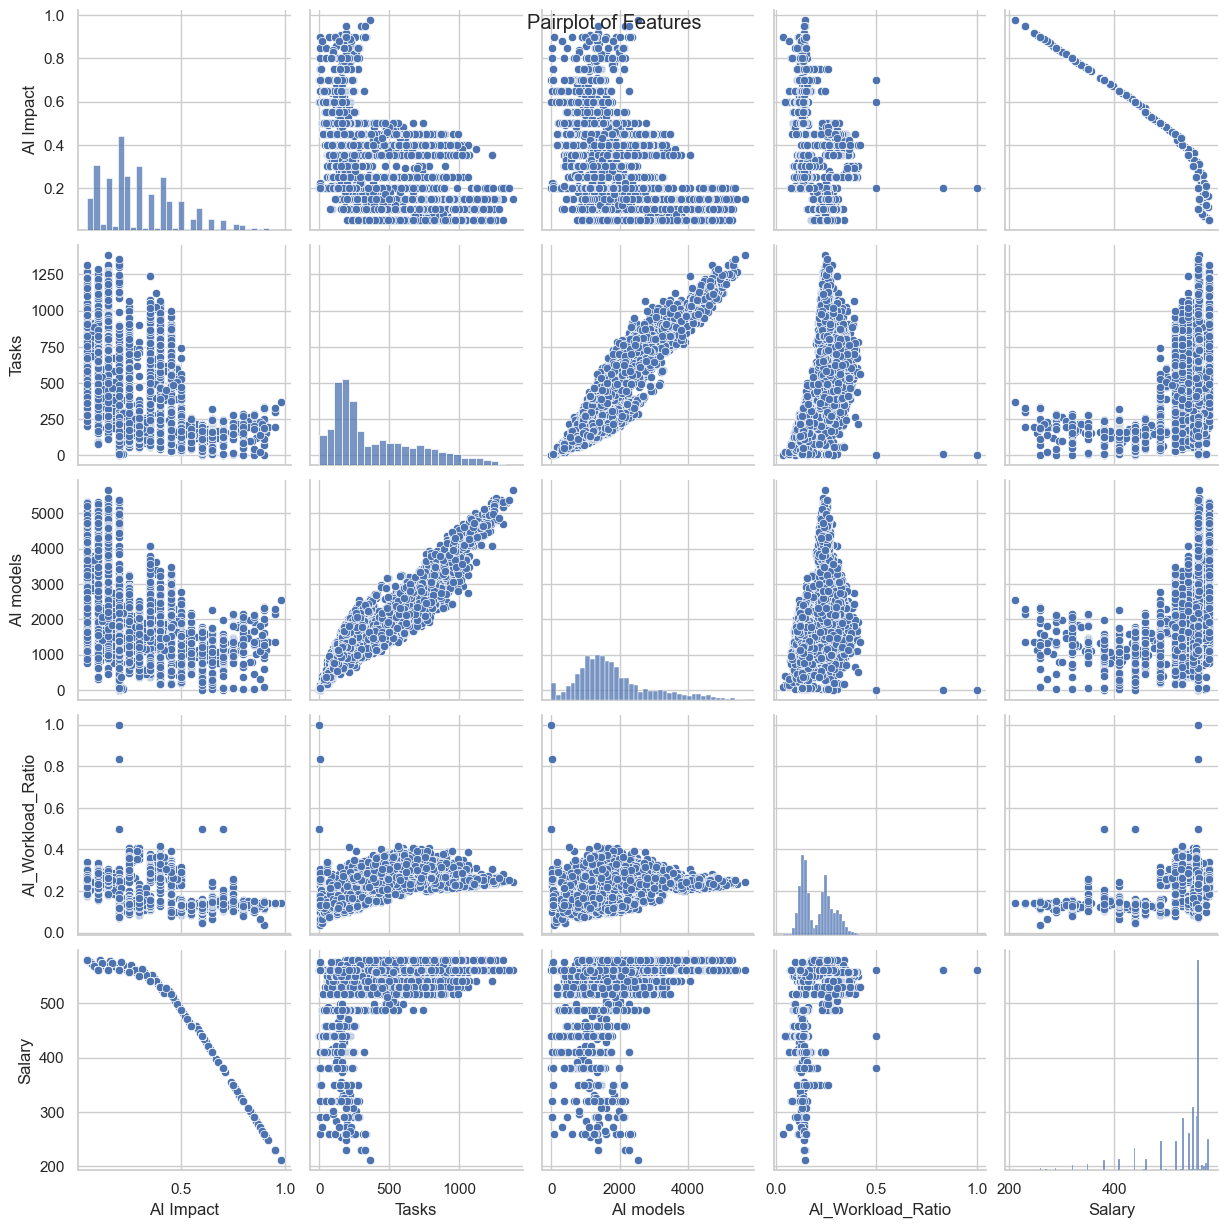

In [50]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
sns.pairplot(data_numerik)
plt.suptitle('Pairplot of Features')
plt.show()

<Axes: title={'center': 'Negara'}, xlabel='Country', ylabel='count'>

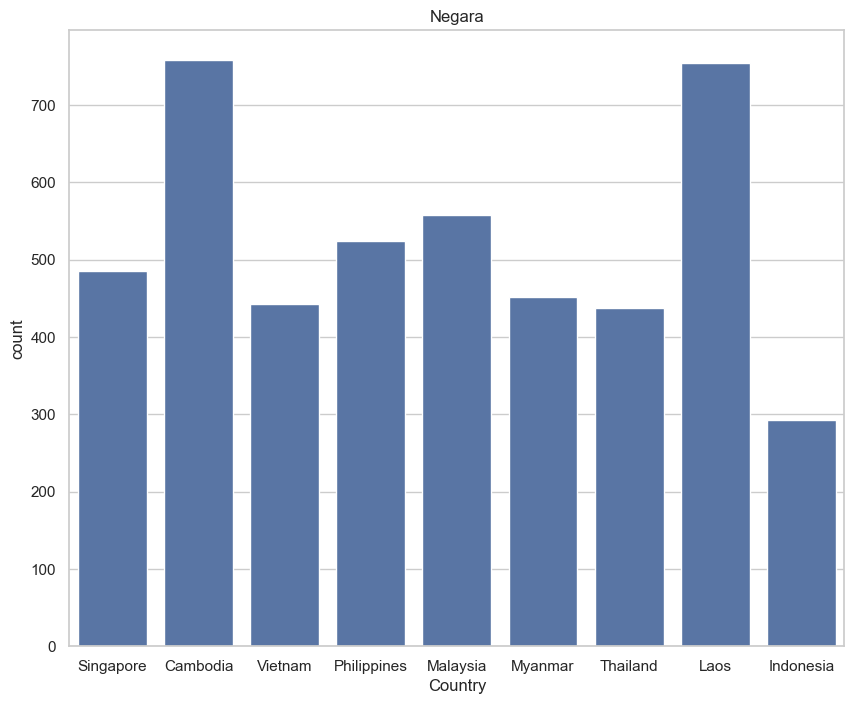

In [51]:
plt.figure(figsize=(10, 8))
plt.title("Negara")
sns.countplot(data=data,x="Country")

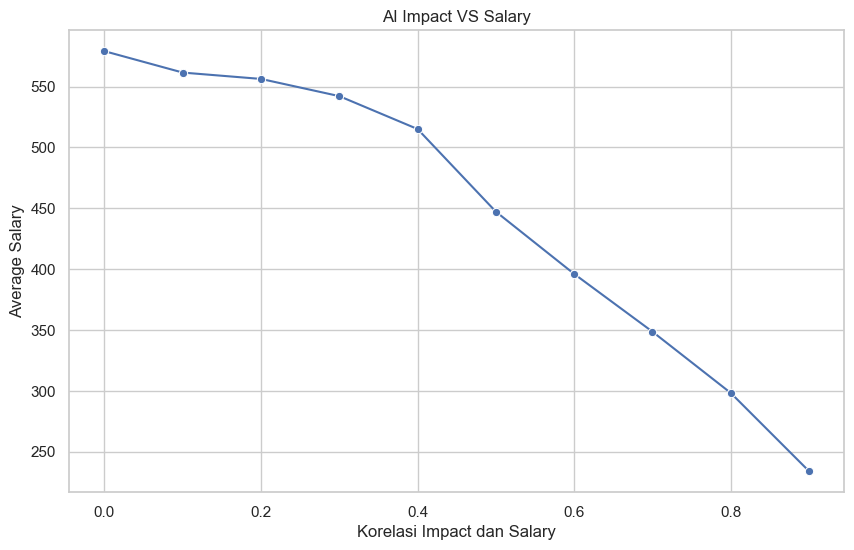

In [52]:
data['AI Impact Binned'] = (data['AI Impact'] // 0.1) * 0.1

salary_mean = data.groupby('AI Impact Binned')['Salary'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='AI Impact Binned', y='Salary', data=salary_mean, marker="o")
plt.title('AI Impact VS Salary')
plt.xlabel('Korelasi Impact dan Salary')
plt.ylabel('Average Salary')
plt.show()


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job titles         4706 non-null   object 
 1   AI Impact          4706 non-null   float64
 2   Tasks              4706 non-null   int64  
 3   AI models          4706 non-null   int64  
 4   AI_Workload_Ratio  4706 non-null   float64
 5   Domain             4706 non-null   object 
 6   Country            4706 non-null   object 
 7   Salary             4706 non-null   float64
 8   AI Impact Binned   4706 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 331.0+ KB


In [54]:
data["Domain"].unique()

array(['Hospitality', 'Supply Chain & Logistics', 'Law Enforcement',
       'Sales & Marketing', 'Construction', 'Medical & Healthcare',
       'Leadership & Strategy', 'Communication & PR',
       'Administrative & Clerical', 'Data & IT'], dtype=object)

In [55]:
# fitur yang digunakan selain domain, workload ratio, dan Job titles karena relevansinya kurang

data = data.drop(columns=["Job titles", "Domain", "AI_Workload_Ratio"])

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AI Impact         4706 non-null   float64
 1   Tasks             4706 non-null   int64  
 2   AI models         4706 non-null   int64  
 3   Country           4706 non-null   object 
 4   Salary            4706 non-null   float64
 5   AI Impact Binned  4706 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 220.7+ KB


In [57]:
data.head()

,AI Impact,Tasks,AI models,Country,Salary,AI Impact Binned
0,0.90,242,1903,Singapore,260.00,0.8
1,0.05,1174,4677,Cambodia,580.00,0.0
2,0.25,836,2289,Vietnam,556.25,0.2
3,0.30,127,1382,Philippines,550.00,0.2
4,0.85,3,30,Singapore,290.00,0.8


In [58]:
encoder = LabelEncoder()
encoder.fit(['Cambodia','Vietnam','Myanmar','Laos','Philippines','Malaysia','Thailand','Indonesia','Singapore'])

LabelEncoder()

In [59]:
data["Country"] = encoder.transform(data["Country"])

In [60]:
data.head()

,AI Impact,Tasks,AI models,Country,Salary,AI Impact Binned
0,0.90,242,1903,6,260.00,0.8
1,0.05,1174,4677,0,580.00,0.0
2,0.25,836,2289,8,556.25,0.2
3,0.30,127,1382,5,550.00,0.2
4,0.85,3,30,6,290.00,0.8


In [61]:
x = data.drop(columns="Salary")
y = data["Salary"]

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [63]:
regr = GradientBoostingRegressor()
rdf = RandomForestRegressor()
dtr = DecisionTreeRegressor()
xgr = XGBRegressor(objective='reg:squarederror')

models = [regr, rdf, dtr, xgr]
model_names = ['Gradient Boosting', 'Random Forest', 'Decision Tree', 'XGBoost']


In [64]:
r2_scores = []
rmse_values = []

for model in models:

    model.fit(x_train, y_train)


    y_pred = model.predict(x_test)
    print(f'Model: {model.__class__.__name__}')
    print(f'R2 Score: {r2_score(y_test, y_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')


    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)


Model: GradientBoostingRegressor
R2 Score: 0.9997144393856432
RMSE: 0.894994025705226
Model: RandomForestRegressor
R2 Score: 0.9997886838051789
RMSE: 0.7699054135455827
Model: DecisionTreeRegressor
R2 Score: 0.9996888204743976
RMSE: 0.9342787901635513
Model: XGBRegressor
R2 Score: 0.9998225270189612
RMSE: 0.7055651225343595


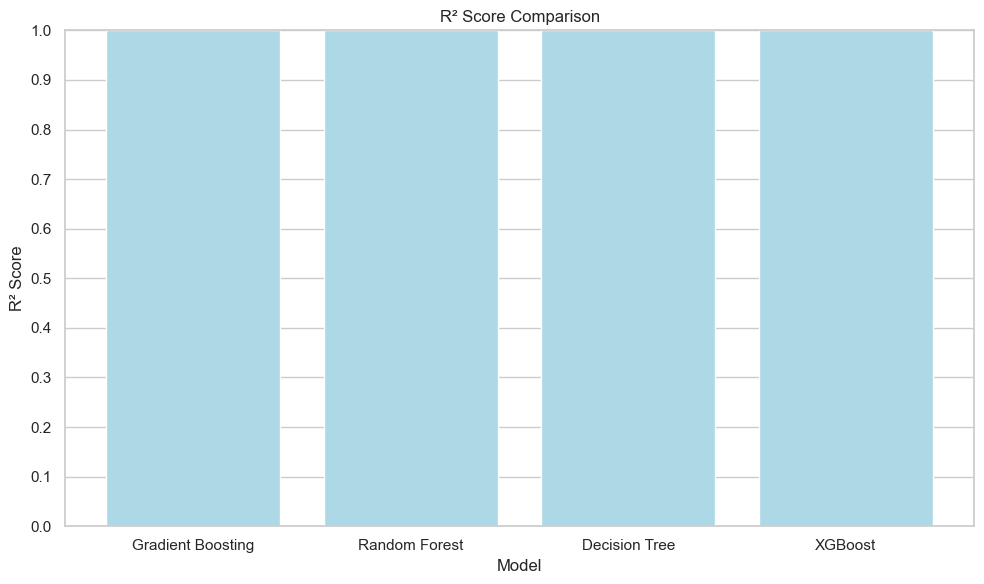

In [65]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color='lightblue')
plt.title('R² Score Comparison')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.ylim([0, 1])
plt.yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()
plt.show()

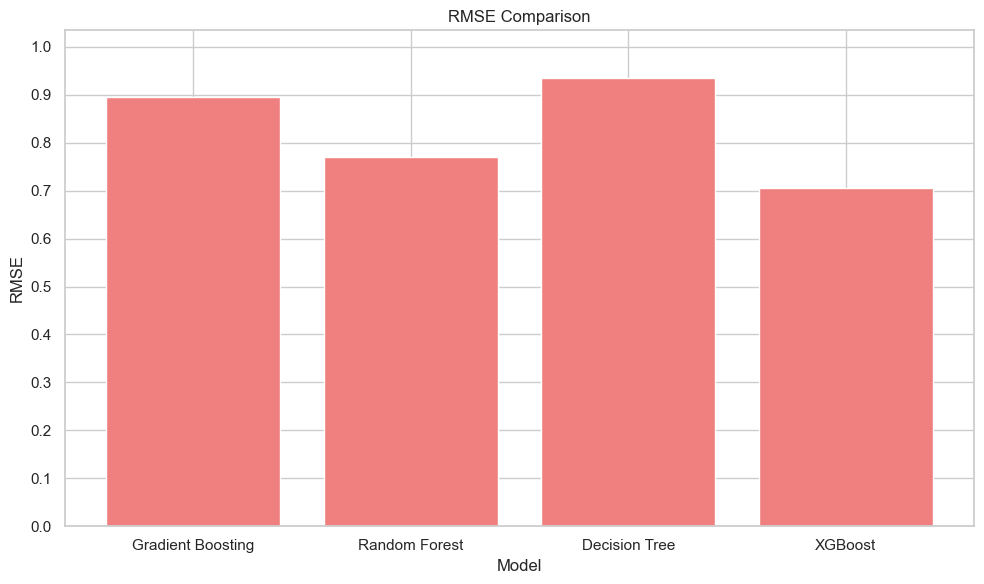

In [66]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color='lightcoral')
plt.title('RMSE Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.ylim([0, max(rmse_values) + 0.1])
plt.yticks(np.arange(0, max(rmse_values) + 0.1, 0.1))
plt.tight_layout()
plt.show()